#**Dataset description**

The MPG dataset is technical spec of cars originaly provided from UCI Machine Learning Repository. The data concerns city-cycle fuel consumption in miles per gallon to be analyzed in terms of 3 multivalued discrete and 5 continuous attributes.

# **Environment set-up**

In [15]:
# importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wrangling**

*   Missingness in our dataframe
*   Inconsistent data types
*   Duplicated rows
*   columns to be droped or re-parsed





In [16]:
# loading the mpg dataset from filepath
mpg_filepath = '/content/drive/MyDrive/Colab Notebooks/my_dataset/auto-mpg.csv'
mpg_df = pd.read_csv(mpg_filepath)

In [17]:
# taking a look at the dataset's head
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [18]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [19]:
# cheking for any duplicated rows
mpg_df.duplicated().sum()

0

In [20]:
# cheking columns unique values
mpg_df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,94
weight,351
acceleration,95
model year,13
origin,3
car name,305


In [21]:
mpg_df.horsepower.unique()


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [22]:
(mpg_df['horsepower'] == '?').sum()

6

# **Data Cleaning**

**Cleaning horsepower column**

we'd drop each row that contains a ? on the horsepower column.

In [23]:
# dropping '?' values
mpg_df = mpg_df[mpg_df.horsepower !='?']

# confirming changes
(mpg_df.horsepower == '?').sum()

0

In [24]:
# casting horsepower column to integer
mpg_df.horsepower = mpg_df.horsepower.astype(int)

# confirming changes
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


<ipython-input-24-f16bb7bd9747>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_df.horsepower = mpg_df.horsepower.astype(int)


**Handling origin column**

In [25]:
# parcing origin column
mpg_df.loc[mpg_df.origin == 1, 'origin'] = 'USA'
mpg_df.loc[mpg_df.origin == 2, 'origin'] = 'Europe'
mpg_df.loc[mpg_df.origin == 3, 'origin'] = 'Asia'

# casting origin column into category
mpg_df['origin'] = mpg_df['origin'].astype('category')

# validating changes
mpg_df['origin'].dtype

<ipython-input-25-c62fcfa594b2>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'USA' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mpg_df.loc[mpg_df.origin == 1, 'origin'] = 'USA'
<ipython-input-25-c62fcfa594b2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_df['origin'] = mpg_df['origin'].astype('category')


CategoricalDtype(categories=['Asia', 'Europe', 'USA'], ordered=False, categories_dtype=object)

# **Data Visualization**

In this,

*   Informative visuals to draw insights
*   EDA
*   Informative visuals to help conclusions




In [26]:
# displaying summary statistics
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


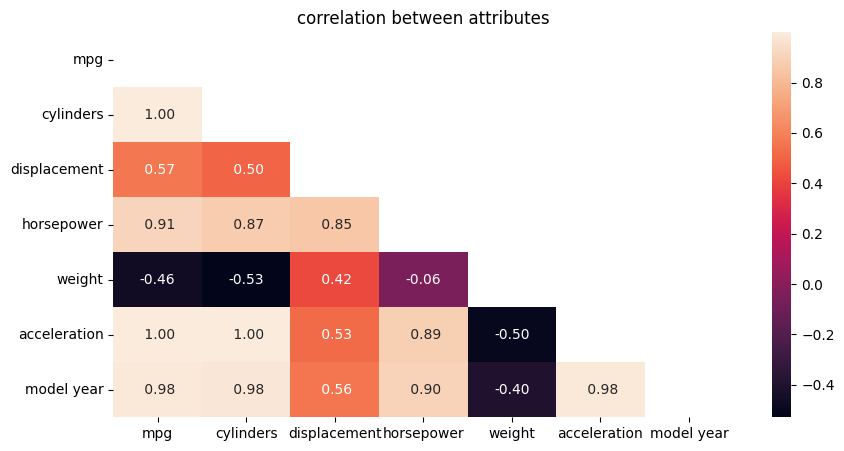

In [44]:
# plotting correlation heatmap
plt.figure(figsize=(10,5))
corr = mpg_df.describe().corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, mask= mask, fmt = ' .2f')
plt.title("correlation between attributes")
plt.show()

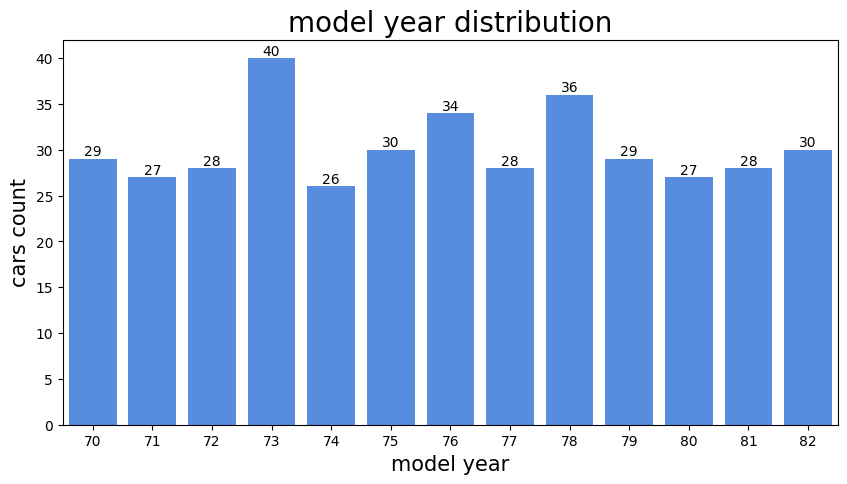

In [45]:
# displaying histogram of model year distribution
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'model year', data = mpg_df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("model year distribution", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

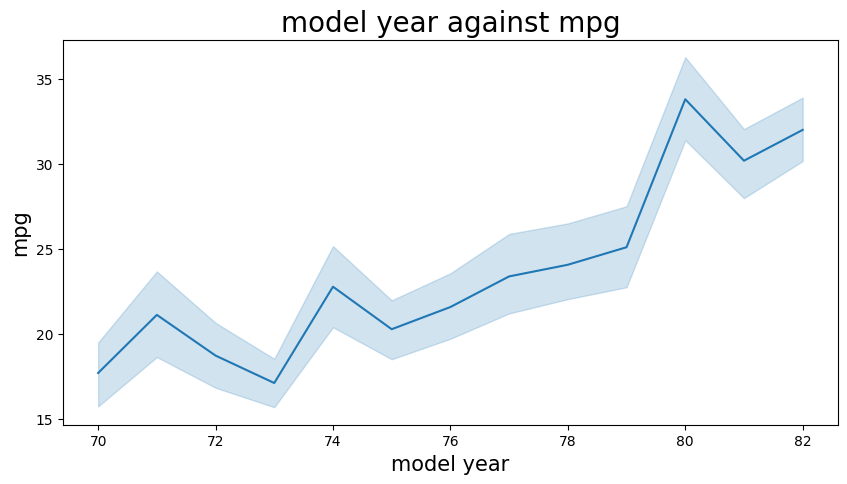

In [46]:
# ploting model year against mpg
plt.figure(figsize=(10,5))
plt.title("model year against mpg", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
sns.lineplot(x = 'model year', y = 'mpg', data = mpg_df);

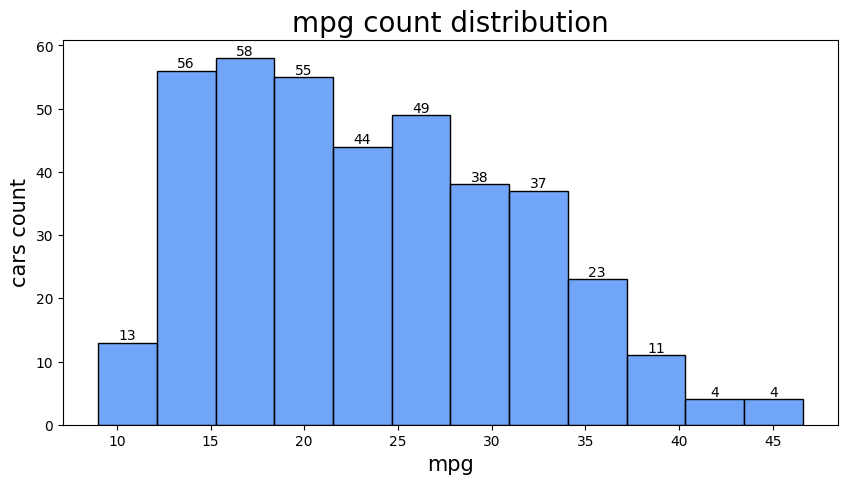

In [47]:
# ploting mpg distribution
plt.figure(figsize=(10,5))
ax = sns.histplot(x = 'mpg', data = mpg_df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("mpg count distribution", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

Most of the cars in our dataset have mpg between 15 to 20. Our data is also skewed to the right.

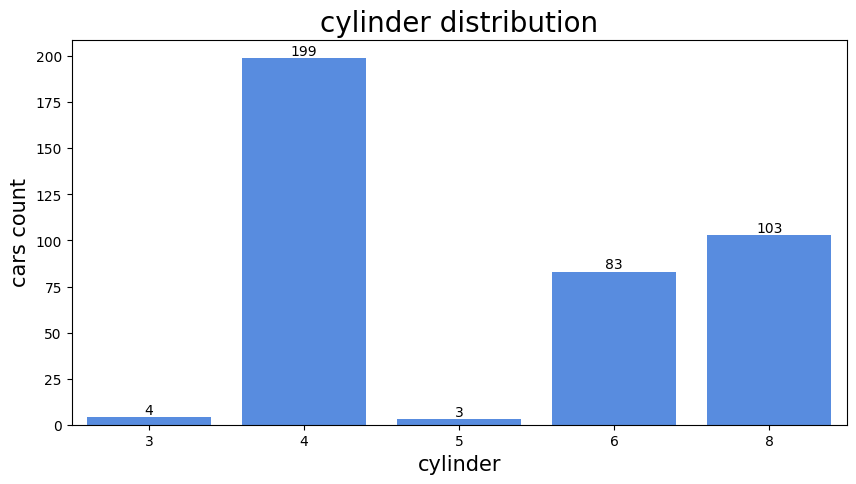

In [48]:
# displaying cylinder column distribution
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'cylinders', data = mpg_df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("cylinder distribution", fontsize = 20)
plt.xlabel("cylinder", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

The vast majority in cars have 4 cylinder engine.

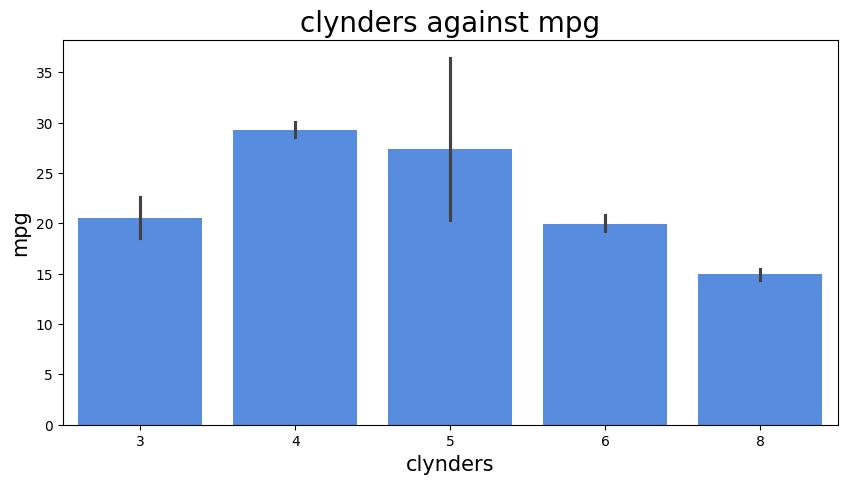

In [49]:
# ploting cylinder against mpg
plt.figure(figsize=(10,5))
sns.barplot(x = 'cylinders', y = 'mpg', data = mpg_df, color = '#4287f5')
plt.title("clynders against mpg", fontsize = 20)
plt.xlabel("clynders", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

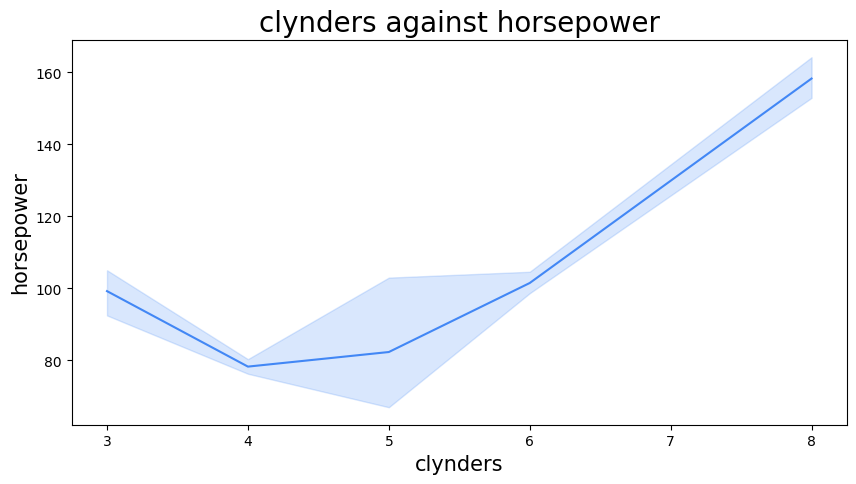

In [50]:
# ploting cylinder against horsepower
plt.figure(figsize=(10,5))
sns.lineplot(x = 'cylinders', y = 'horsepower', data = mpg_df, color = '#4287f5')
plt.title("clynders against horsepower", fontsize = 20)
plt.xlabel("clynders", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show()

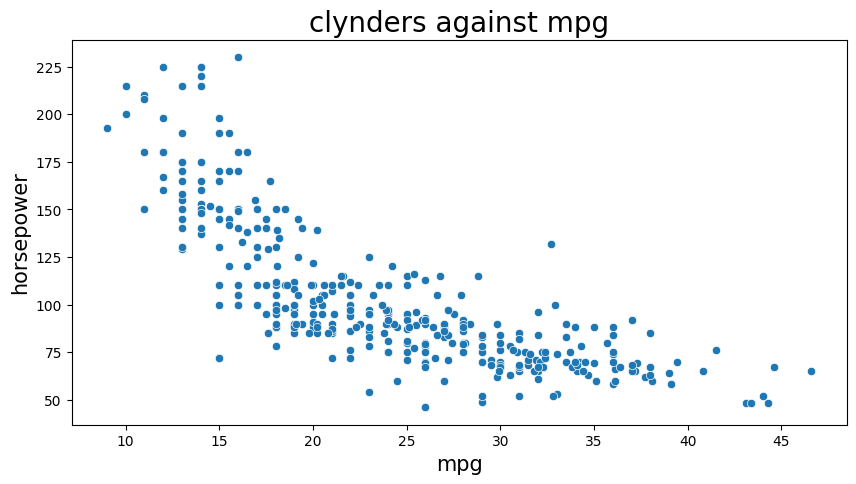

In [52]:
# ploting mpg against horsepower
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'mpg', y = 'horsepower', data = mpg_df)
plt.title("clynders against mpg", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show()



*   As cylinders in the engine increases above 4, MPG decreases.
*   As cylinders in the engine increases above 4, engine horsepower increases.
*   there is negative correlation between mpg and horsepower.






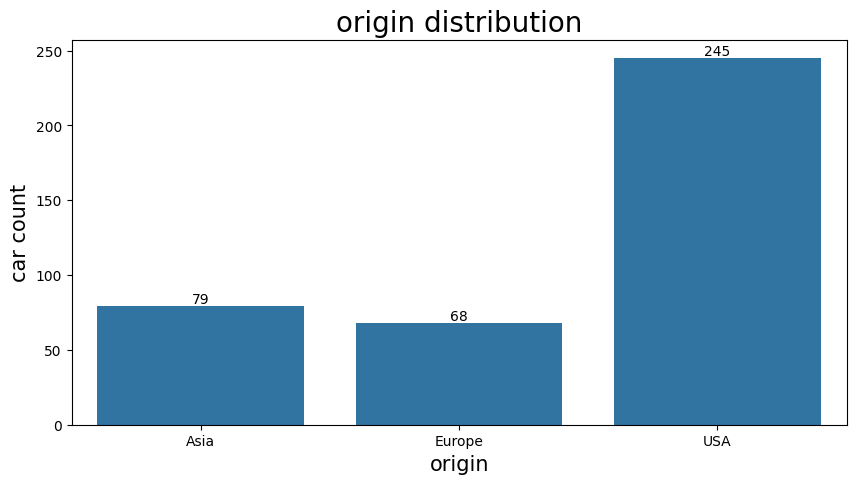

In [53]:
# ploting cars origin dist
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'origin', data = mpg_df)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("origin distribution", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("car count", fontsize = 15)
plt.show()

We can see that USA alne produces more than 64% of the total cars in our dataset.

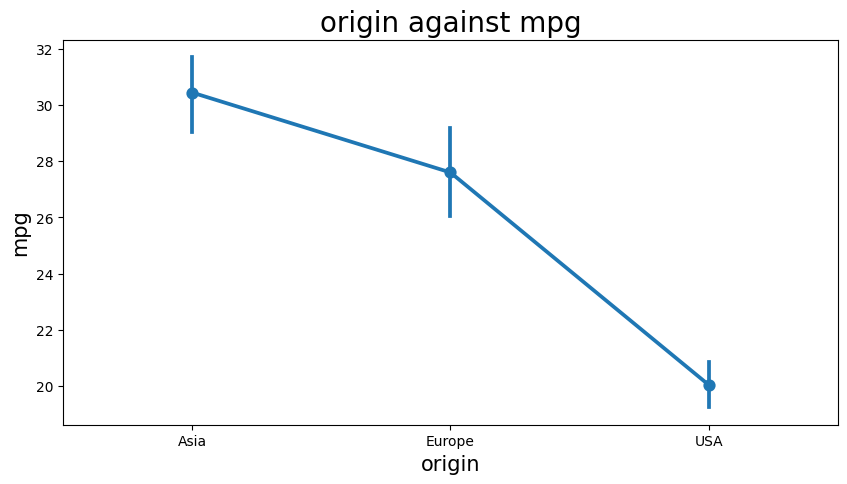

In [54]:
# ploting origin against mpg
plt.figure(figsize=(10,5))
sns.pointplot(x = 'origin', y = 'mpg', data = mpg_df)
plt.title("origin against mpg", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

Althogh USA has the biggest count of our dataset, it produces cars we relatively very low mpg compared to Asia and Europe.

Asia is the leading contry in producing cars with high mpg with a mean close to 30.

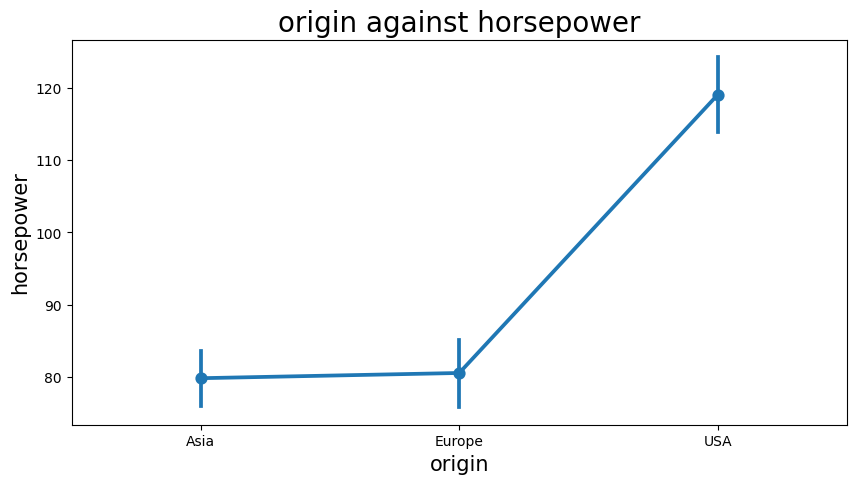

In [55]:
# ploting origin against horsepower
plt.figure(figsize=(10,5))
sns.pointplot(x = 'origin', y = 'horsepower', data = mpg_df)
plt.title("origin against horsepower", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show()

USA has the highest engine horsepower.

<ipython-input-56-7f48f2646713>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x = 'model year', y = 'mpg', hue = 'origin', data = mpg_df, ci = None);


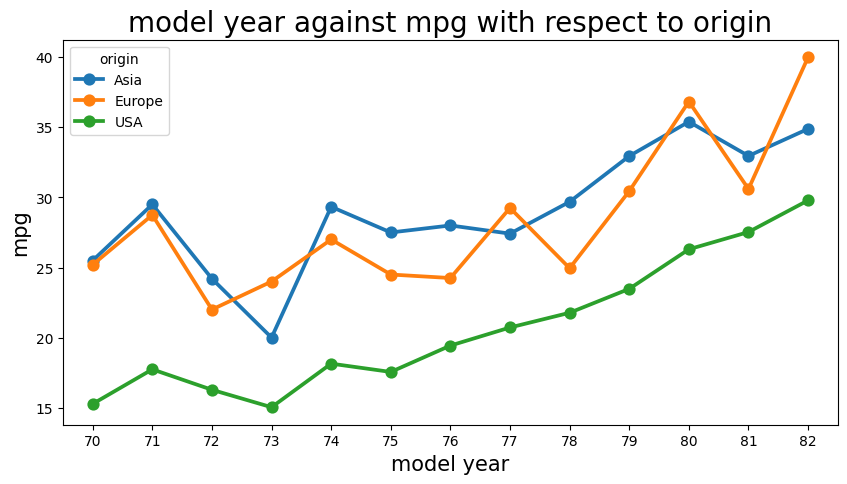

In [56]:
# display model year against mpg with respect to origin
plt.figure(figsize=(10,5))
sns.pointplot(x = 'model year', y = 'mpg', hue = 'origin', data = mpg_df, ci = None);
plt.title("model year against mpg with respect to origin", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

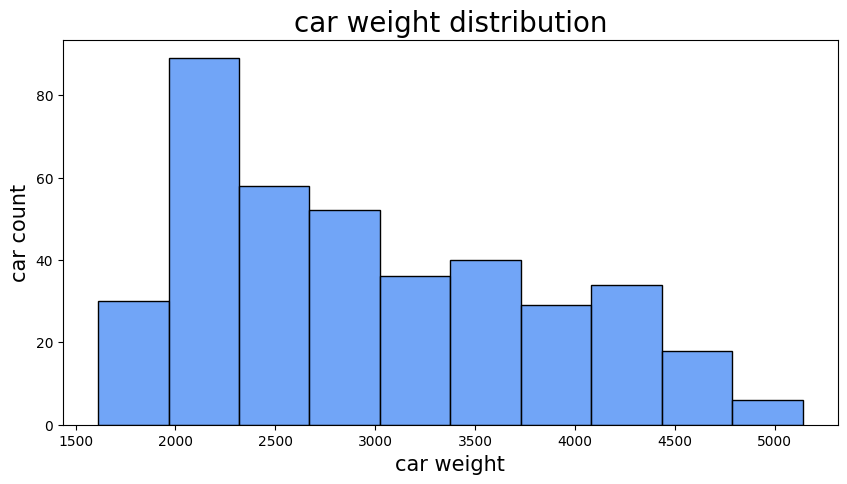

In [57]:
# plot a dist. of car weight
plt.figure(figsize=(10,5))
sns.histplot(x = 'weight', data = mpg_df, color = '#4287f5')
plt.title("car weight distribution", fontsize = 20)
plt.xlabel("car weight", fontsize = 15)
plt.ylabel("car count", fontsize = 15)
plt.show()

car weight varies from 1500 to 5000, with the majority of cars at 2000.

<ipython-input-58-f6f706a9cd39>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = 'model year', y = 'weight', data = mpg_df,


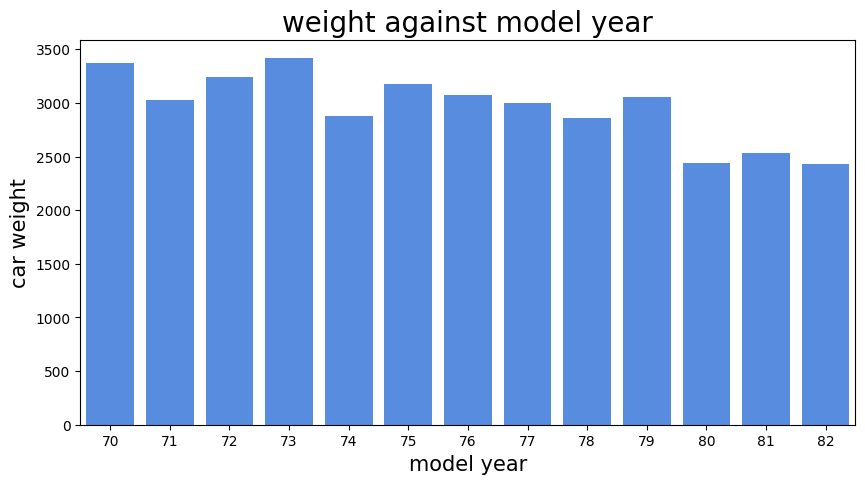

In [58]:
# plotting weight against model year
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'model year', y = 'weight', data = mpg_df,
                 color = '#4287f5', ci = None)
plt.title("weight against model year", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("car weight", fontsize = 15)
plt.show()

Car weight has been decreasing over the years.

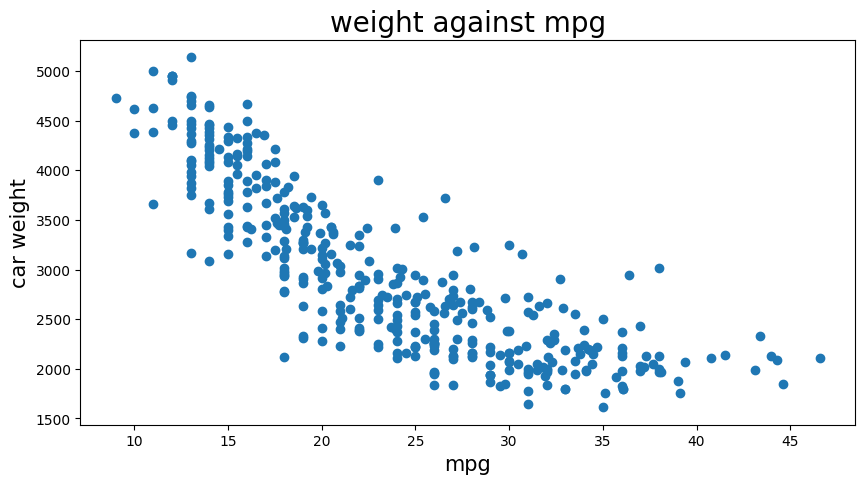

In [59]:
# plotting weight against mpg
plt.figure(figsize=(10,5))
plt.scatter(x = 'mpg', y = 'weight', data = mpg_df)
plt.title("weight against mpg", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("car weight", fontsize = 15)
plt.show()

mpg inceases as weight decreses over time, that indecates a strong correlation between them.

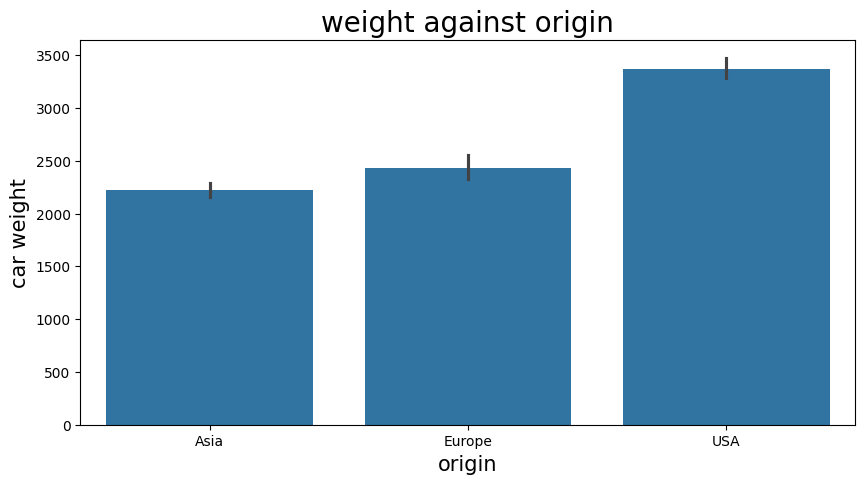

In [60]:
# plotting weight against origin
plt.figure(figsize=(10,5))
sns.barplot(x = 'origin', y = 'weight', data = mpg_df)
plt.title("weight against origin", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("car weight", fontsize = 15)
plt.show()

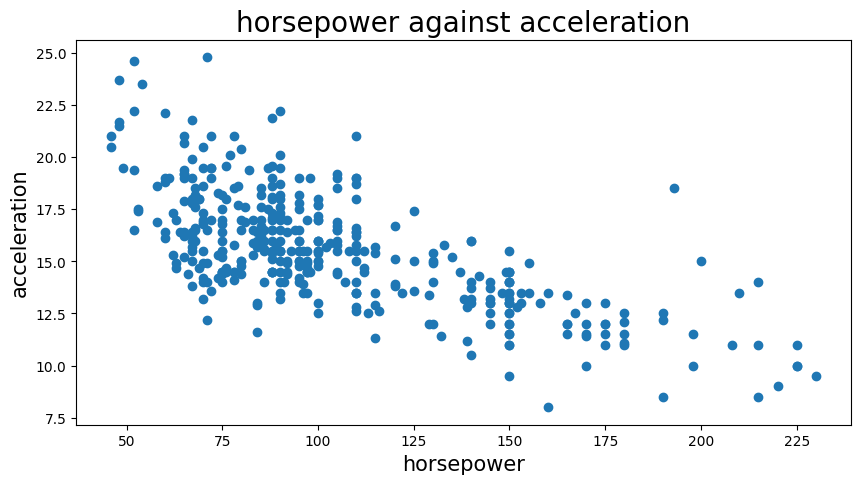

In [61]:
# plotting horsepower against acceleration
plt.figure(figsize=(10,5))
plt.scatter(x = 'horsepower', y = 'acceleration', data = mpg_df)
plt.title("horsepower against acceleration", fontsize = 20)
plt.xlabel("horsepower", fontsize = 15)
plt.ylabel("acceleration", fontsize = 15)
plt.show()

Wa can spot a negative correlation between acceleration and horepower, this means that it has a positive one with mpg.